<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Demo 5.3
# *Support Vector Machines*

SVMs use linear algebra to find an (n-1)-dimensional boundary that separates classes within an n-dimensional space. In practical terms, this technique provides a conceptually simple way to predict class membership from a set of features.

The standard (linear) SVM is immediately applicable to linear classification problems. Furthermore, by applying transformations to the feature space it is possible to tackle nonlinear classification problems. These transforms are called *kernels*.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

%matplotlib inline

## Linear SVM

Here we will apply a linear kernel to separate two clusters in 2D. This means our solution hyperplane will be a straight line in the x-y plane.  

We will use the `SVC` (support vector classification) algorithm from the `svm` library.

Scikit-learn has a handy function for generating synthetic data in clusters:

In [2]:
# Create 40 separable points:
X, y = make_blobs(n_samples = 40, centers = 2, random_state = 6)

In [5]:
X.shape, y.shape

((40, 2), (40,))

In [6]:
print(X[:4,0], X[:4,1], y[:4])

[6.37734541 6.50072722 4.29225906 7.39169472] [-10.61510727  -3.82403586  -8.99220442  -3.1266933 ] [1 0 1 0]


X is a 2-column matrix representing 40 (x,y) pairs and y is the cluster membership vector.

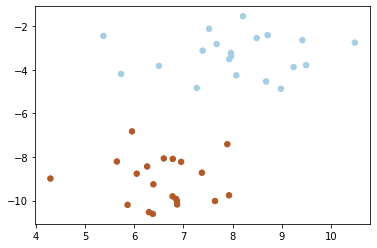

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap = plt.cm.Paired)  # cmap is the colour map for c
plt.show()

Like many Scikit-learn algorithms, svm.SVC applies regularization by default. For this demo, we will train the model with regularization suppressed:

In [8]:
# fit the model, without regularization (make C large):
clf = svm.SVC(kernel = 'linear', C = 1000)
clf.fit(X, y)

SVC(C=1000, kernel='linear')

In [9]:
clf.support_vectors_

array([[ 7.27059007, -4.84225716],
       [ 5.95313618, -6.82945967],
       [ 7.89359985, -7.41655113]])

This will plot the data with the solution hyperplane and dividing boundaries superimposed. Make sure to look up any methods you aren't familiar with and add some comments to explain what they are doing.

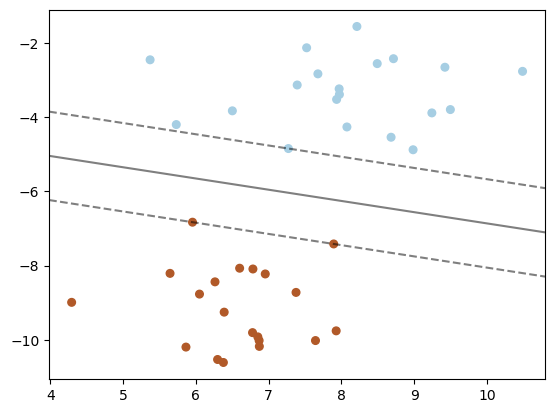

In [27]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap = plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()  # the starting and ending points of the x-axis
ylim = ax.get_ylim()  # starting and ending points of the y-axis

# create grid to evaluate model

xx = np.linspace(xlim[0], xlim[1], 30) # 30 points evenly spaced along the x-axis
yy = np.linspace(ylim[0], ylim[1], 30) # 30 points evenly spaced along the y-axis

# meshgrid is the grid of points formed by the intersection of xx and yy.
#   - YY is the list of vertical coordinates and
#   - XX is the list of vertical coordinates)
# Since there are 30 points along the x-axis and 30 points along the y-axis, the grid has 900 points
YY, XX = np.meshgrid(yy, xx) 
xy = np.vstack([XX.ravel(), YY.ravel()]).T # stack the set of grid points into one long list

# The decision function returns the distance of a point from the deciding hyperplace
# Return value 0 => point is on the boundary.  Otherwise sign of result indicates one side or another.

Z = clf.decision_function(xy).reshape(XX.shape) # evaluate the decision function at each grid point 

# plot decision boundary and margins
# levels argument tells contour to only plot meshgrid points where the result of the decision function is exactly equal to 0, 1, or -1
#   - decision function == 0: The point is on the decision boundary (the hyperplane)
#   - decision function == 1: The point is on one of the margin boundaries
#   - decision function == -1: The point is on the other margin boundary.
# This data was manufactured so that the margin values would be exactly +/- 1
ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 100, linewidth = 1, facecolors = 'none', marker="*")
plt.show()

In [12]:
# Create a 2D array 
arr = np.array([[1, 2, 3], [4, 5, 6]])
print(arr)

# Flatten the array
flat_arr = np.ravel(arr)
print(flat_arr)

[[1 2 3]
 [4 5 6]]
[1 2 3 4 5 6]


## Nonlinear SVM

Here we will apply a nonlinear kernel to separate two classes where a linear kernel would fail. For this we will use the `NuSVC` algorithm from the `svm` library.

Nu-Support Vector Classification: Similar to SVC but uses a parameter ("nu", ν) to control the number of support vectors.

Generating this dataset relies on a logical trick to classify the points by which quadrant they are in:

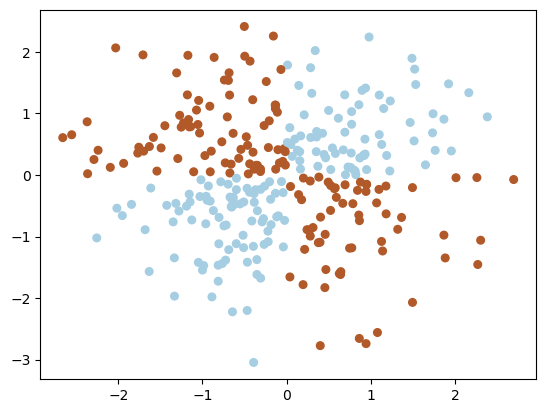

In [36]:
np.random.seed(0)
X = np.random.randn(300, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap = plt.cm.Paired)

For this demo we will train the model using default parameters, so we instantiate an `svm.NuSVC` with no arguments:

In [37]:
# fit the model
nusvc = svm.NuSVC()
nusvc.fit(X, y)

NuSVC()

The next visualization requires some tricky coding. The `svm.NuSVC` class has a `decision_function` method that we can use to create a heatmap to show how the likelihood of class membership varies over the 2D feature space. The Numpy `meshgrid` function is useful for creating our 2D spatial grid, but the `decision_function` method need the grid to be passed as a 2D array with x-values in the 1st column and y-values in the second:

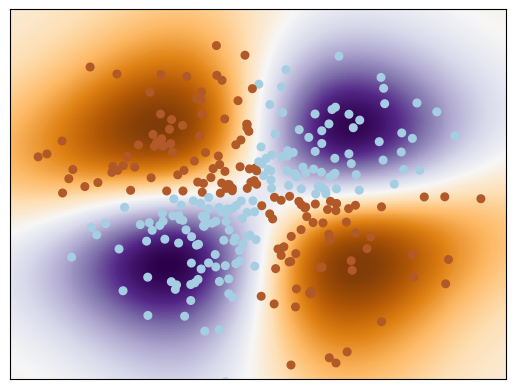

In [38]:
# Plot the decision function for each datapoint on the grid ...

# create a fine grid on which to calculate the function:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))

# use ravel() to transform each array into 1 contiguous vector (row-wise or column-wise);
# then use c_[] to create an array with one column for each or these two vectors;
# then apply the decision_function() to compute the distance of each sample X to the separating hyperplane:
Z = nusvc.decision_function(np.c_[xx.ravel(), yy.ravel()])

# finally, change the shape of the result back into that of the original grid:
Z = Z.reshape(xx.shape)  # put results back into original geometry

# plot Z as a heatmap:
plt.imshow(Z, interpolation = 'nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()), aspect = 'auto',
           origin = 'lower', cmap = plt.cm.PuOr_r)

# plot decision boundaries:
# contours = plt.contour(xx, yy, Z, levels = [0], linewidths = 2, linetypes = '--')
# contours = plt.contour(xx, yy, Z, levels = [0], linewidths = 2, linestyles = '--')

# plot original data points:
# plt.scatter(X[:, 0], X[:, 1], s = 30, c = y, cmap = plt.cm.Paired, edgecolors = 'k')
plt.scatter(X[:, 0], X[:, 1], s = 30, c = y, cmap = plt.cm.Paired)

# scaling, final rendering:
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

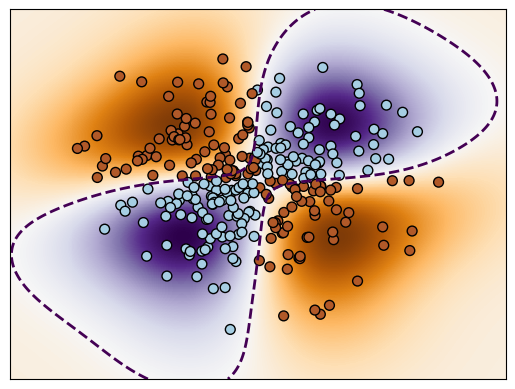

In [39]:
# Creating functions to call for the meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # Adding some margin
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # Adding some margin

# using the adjusted range to plot
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Use ravel() to transform each array into 1 contiguous vector (row-wise or column-wise);
# then use c_[] to create an array with one column for each of these two vectors;
# then apply the decision_function() to compute the distance of each sample X to the separating hyperplane:
Z = nusvc.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Finally, change the shape of the result back into that of the original grid:
Z = Z.reshape(xx.shape)  # Put results back into original geometry
# Plot the decision function as a heatmap
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)

# Plot decision boundaries
plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles='--')  # Note: 'linetypes' changed to 'linestyles'

# Plot original data points
plt.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap=plt.cm.Paired, edgecolors='k')

# Set axis limits based on the data range
plt.axis([x_min, x_max, y_min, y_max])

# Remove x and y ticks
plt.xticks(())
plt.yticks(())

# Show the final plot
plt.show()

## === End ===



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



